<a href="https://colab.research.google.com/github/Sudhanshu20004-9/AI-tech-Lab1/blob/main/Lab%204%20ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-15-a6ad0f0f10f0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.fillna(features.mean(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

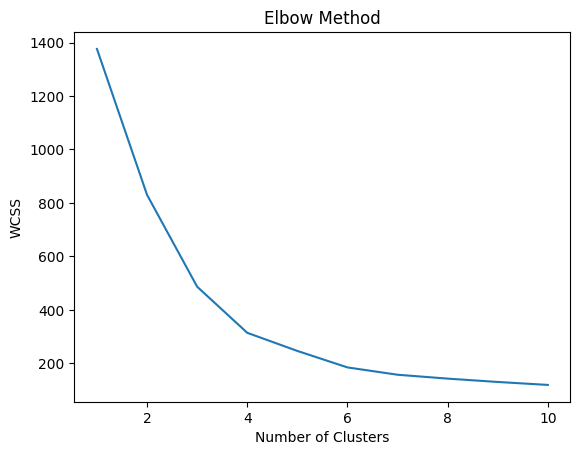

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
cluster                                                                   
0               41.835023        18.363594         190.313364  3708.294931
1               47.589516        15.004839         216.895161  5064.919355
2               42.000000        20.200000        5000.000000  4250.000000


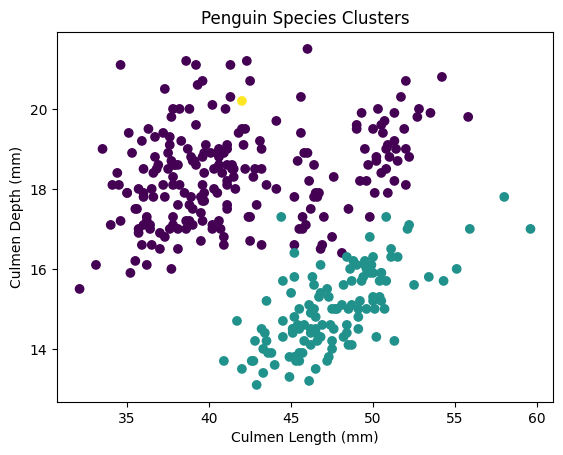

In [15]:
# prompt: I need a code for classifying penguin species based on their parameters like sex, culmen_length, culmen_depth and body mass by K-means clustering model and taking input dataset

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('penguins.csv')  # Replace 'penguins.csv' with your dataset file name

# Select relevant features
features = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Handle missing values (replace with mean for simplicity)
features.fillna(features.mean(), inplace=True)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters (using the Elbow method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters (let's assume it's 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the dataframe
data['cluster'] = kmeans.labels_

# Analyze the clusters
# Analyze the clusters
print(data.groupby('cluster').mean(numeric_only=True)) # Add numeric_only=True to only calculate the mean of numeric columns

# Visualize the clusters (using the first two features for simplicity)
plt.scatter(data['culmen_length_mm'], data['culmen_depth_mm'], c=data['cluster'])
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Penguin Species Clusters')
plt.show()
